Problemas cap 7 Movimento oscilatório harmónico simples
7. Uma mola exerce uma força Fx = -k x (t), em que k é a constante elástica da mola, num corpo de massa m.
Considere k = 1 N/m e m = 1 kg.





a) Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 4 m.


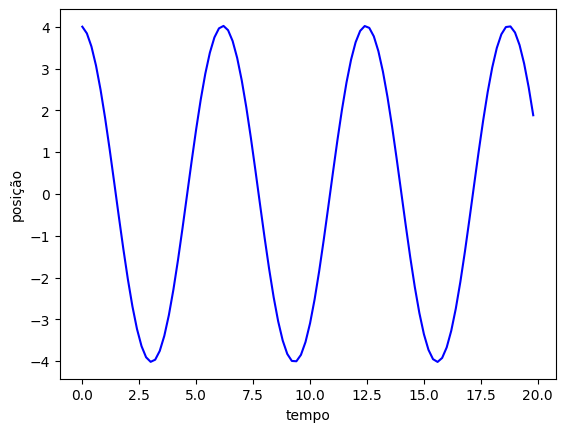

5.000000000000002
1.5512514166321214
----------
5.200000000000002
2.2582692827703323
----------
5.400000000000002
2.87495637759773
----------
5.600000000000002
3.3766452173212183
----------
5.8000000000000025
3.743268248351858
----------
6.000000000000003
3.960160549448423
----------
6.200000000000003
4.018646428567051
----------
6.400000000000003
3.916386450542997
----------


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Ex1
#a) lei do movimento e da velocidade
#dados: velocidade - 27.78
def euler():
    dt = 0.2
    tf = 20
    n = int(tf/dt+0.1)

    t = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)

    vx[0] = 0
    t[0] = 0
    x[0] = 4
    m=1
    k=1

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i]=-(k/m)**2*x[i]
        vx[i+1] = vx[i]+ax[i]*dt
        x[i+1] = x[i]+vx[i+1]*dt

    return t, x, vx, n

t, x, vx, n = euler()

plt.plot(t,x,"b-")
plt.xlabel("tempo")
plt.ylabel("posição")
plt.show()

for i in range(n-1):
    if(t[i+1]>5-0.035 and t[i+1]<6.5+0.035):
        print(t[i+1])
        print(x[i+1])
        print("----------")
    




b) Calcule a amplitude do movimento e o seu período, usando interpolação dos resultados numéricos


In [2]:
def maxminv(x0,x1,x2,y0,y1,y2): 
    # Máximo ou mínimo usando o polinómio de Lagrange
    # Dados (input): (x0,y0), (x1,y1) e (x2,y2) 
    # Resultados (output): xm, ymax
    xab=x0-x1
    xac=x0-x2
    xbc=x1-x2
    a=y0/(xab*xac)
    b=-y1/(xab*xbc)
    c=y2/(xac*xbc)
    xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2
    xm=0.5*xmla/(a+b+c)
    xta=xm-x0
    xtb=xm-x1
    xtc=xm-x2
    ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xm, ymax

xm,ymax=maxminv(6,6.20,6.40,3.96,4.01,3.91)
print(xm,ymax)

6.166666666666683 4.012083333333333


c) Compare a amplitude e o período obtidos numericamente com os valores teóricos. Concordam?


sim

d) Calcule a energia mecânica, É constante ao longo do tempo?

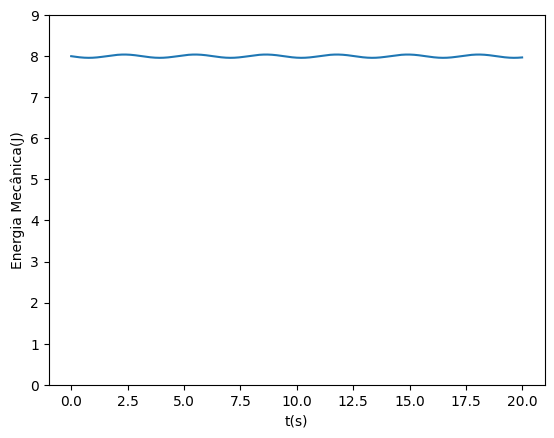

Energia mecanica: 8.00 J



In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Ex1
#a) lei do movimento e da velocidade
#dados: velocidade - 27.78
def euler():
    dt = 0.01
    tf = 20
    n = int(tf/dt+0.1)

    t = np.empty(n)
    x = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)
    EC=np.empty(n)
    EP=np.empty(n)
    E=np.empty(n)


    vx[0] = 0
    t[0] = 0
    x[0] = 4
    m=1
    k=1
    g=9.80
    
    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i]=-(k/m)**2*x[i]
        vx[i+1] = vx[i]+ax[i]*dt
        x[i+1] = x[i]+vx[i+1]*dt
        EC[i] = 0.5*m*np.linalg.norm(np.array(vx[i]))**2
        EP[i] = 0.5*k*np.linalg.norm(np.array(x[i]))**2
        E[i] = EC[i] + EP[i]

    return t, x, vx, n,EC, EP, E

t, x, vx, n,EC, EP, E= euler()

E[-1]=E[-2]
plt.plot(t,E)
plt.xlabel("t(s)")
plt.ylabel("Energia Mecânica(J)")
plt.ylim(0, 9)
plt.show()
print(f"Energia mecanica: {E[0]:.2f} J\n") #nao varia o valor, há conservação de energia




Um corpo de massa 1 kg move-se num oscilador duplo, com dois pontos de equilíbrio, xeq= 1.5 m. O oscilador
tem a energia potencial...

a) Faça o diagrama de energia desta energia potencial (energia potencial em função do espaço). Qual o movimento
quando a energia total for menor que 1 J?


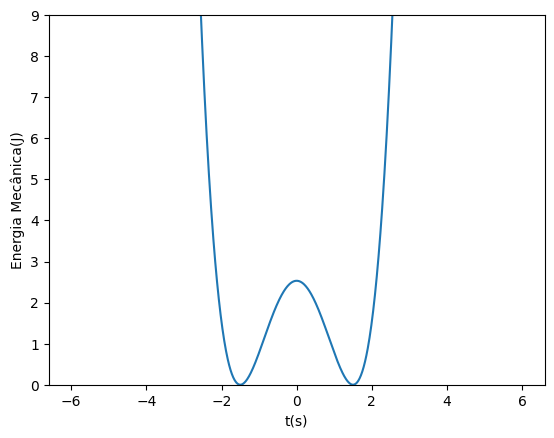

In [4]:
import matplotlib.pyplot as plt
import numpy as np


x2=np.linspace(-6,6,1000)
EP = 0.5*1*(x2**2-1.5**2)**2
        


plt.plot(x2,EP)
plt.xlabel("t(s)")
plt.ylabel("Energia Potencial(J)")
plt.ylim(0, 9)
plt.show()




b) Calcule a lei do movimento, quando a energia total for 0.75 J. Qual a amplitude e a frequência do movimento?


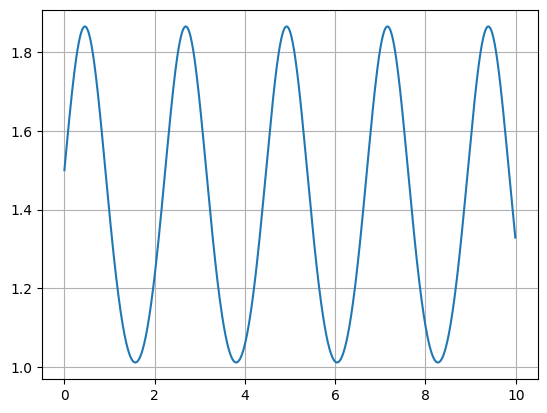

Amplitude: 0.43 m
Período: 2.24 s
Frequência: 0.45 Hz


In [5]:
def Euler():
    dt = 0.01
    tf = 10
    v0 = 1.225
    n = int(tf/dt+0.1)
    M = 1
    K = 1
    Xeq = 1.5

    t = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)
    x = np.empty(n)
    EC = np.empty(n)
    EP = np.empty(n)
    E = np.empty(n)

    vx[0] = v0
    t[0] = 0
    x[0] = Xeq

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i] = -2*K*(x[i]**2 - 1.5**2)*x[i] / M
        vx[i+1] = vx[i] + ax[i]*dt
        x[i+1] = x[i] + vx[i+1]*dt

        EC[i] = 0.5*M*vx[i]**2
        EP[i] = 0.5*K*(x[i]**2 - Xeq**2)**2
        E[i] = EC[i] + EP[i]

    return t, ax, vx, x, n, E, EC, EP

t, ax, vx, x, n, E, EC, EP = Euler()

plt.plot(t, x)
plt.grid()
plt.show()

#ciclo para descobrir os valores para passar na função
''' 
for i in range(n-1):
    if t[i+1] > 1.4 and t[i+1] <1.7+0.035:
        print(f'tempo: {t[i+1]}, posição: {x[i+1]}')
'''

#max
#x0 = 0.4, y0 = 1.8575
#x1 = 0.45, y1 = 1.864
#x2 = 0.49, y2 = 1.861
xm, ymax = maxminv(0.4, 0.45, 0.49, 1.8575, 1.864, 1.861)

#min
#x0 = 1.51, y0 = 1.017
#x1 = 1.57, y1 = 1.012
#x2 = 1.63, y2 = 1.0166
xmin, ymin = maxminv(1.51, 1.57, 1.63, 1.017, 1.012, 1.0166)

print(f'Amplitude: {(ymax-ymin)/2:.2f} m')
print(f'Período: {(xmin-xm)*2:.2f} s')
print(f'Frequência: {1 / ((xmin-xm)*2):.2f} Hz')

c) Calcule a lei do movimento quando a energia total for 3.0 J? Qual a amplitude e a frequência do movimento?


--- alinea C ---


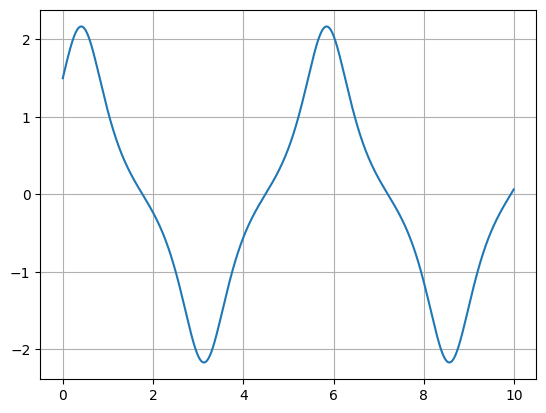

Amplitude: 2.17 m
Período: 5.43 s
Frequência: 0.18 Hz


In [6]:
print("\n--- alinea C ---")

def Euler2():
    dt = 0.01
    tf = 10
    v0 = 2.449 #usar enegia cinetica para acalcular velocidade inicial
    n = int(tf/dt+0.1)
    M = 1
    K = 1
    Xeq = 1.5

    t = np.empty(n)
    vx = np.empty(n)
    ax = np.empty(n)
    x = np.empty(n)
    EC = np.empty(n)
    EP = np.empty(n)
    E = np.empty(n)

    vx[0] = v0
    t[0] = 0
    x[0] = Xeq

    for i in range(n-1):
        t[i+1] = t[i]+dt
        ax[i] = -2*K*(x[i]**2 - 1.5**2)*x[i] / M
        vx[i+1] = vx[i] + ax[i]*dt
        x[i+1] = x[i] + vx[i+1]*dt

        EC[i] = 0.5*M*vx[i]**2
        EP[i] = 0.5*K*(x[i]**2 - Xeq**2)**2
        E[i] = EC[i] + EP[i]

    return t, ax, vx, x, n, E, EC, EP

t, ax, vx, x, n, E, EC, EP = Euler2()

plt.plot(t, x)
plt.grid()
plt.show()

#max
#x0 = 0.33, y0 = 2.1348
#x1 = 0.41, y1 = 2.1678
#x2 = 0.50, y2 = 2.1247
xm, ymax = maxminv(0.33, 0.41, 0.5, 2.1348, 2.1678, 2.1247)

#min
#x0 = 3.019, y0 = -2.107
#x1 = 3.129, y1 = -2.1677
#x2 = 3.189, y2 = -2.147
xmin, ymin = maxminv(3.019, 3.129, 3.189, -2.107, -2.1677, -2.147)

print(f'Amplitude: {(ymax-ymin)/2:.2f} m')
print(f'Período: {(xmin-xm)*2:.2f} s')
print(f'Frequência: {1 / ((xmin-xm)*2):.2f} Hz')